In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("C:/Users/nilsm/MakeAIWork/projects/project1/csv_files/data_frame.csv")
df.head()

,Unnamed: 0,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
0,0,84.0,180.0,90.0,2.0,9.0,1.0,2,86
1,1,84.0,204.0,79.0,3.0,2.0,7.0,3,100
2,2,84.0,174.0,74.0,3.0,20.0,3.0,2,87
3,3,84.0,187.0,78.0,2.0,6.0,5.0,3,91
4,4,84.0,187.0,89.0,2.0,12.0,0.0,2,83


In [36]:
# remove extra index column 
df = df.drop(['Unnamed: 0'],axis=1)
# gather information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   8191 non-null   float64
 1   length    8190 non-null   float64
 2   mass      8191 non-null   float64
 3   exercise  8191 non-null   float64
 4   smoking   8191 non-null   float64
 5   alcohol   8191 non-null   float64
 6   sugar     8192 non-null   int64  
 7   lifespan  8192 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 512.1 KB


In [37]:
# more information!
df.describe()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
count,8191.000000,8190.000000,8191.000000,8191.000000,8191.000000,8191.000000,8192.000000,8192.000000
mean,79.967770,183.642735,79.794286,1.617141,9.773776,5.748260,2.423340,76.096069
std,1.634992,12.600441,12.076801,0.830975,6.967164,2.664489,0.950095,10.918167
min,76.000000,154.000000,60.000000,0.000000,0.000000,0.000000,1.000000,40.000000
25%,79.000000,174.000000,70.000000,1.000000,3.000000,4.000000,2.000000,68.000000
50%,80.000000,183.000000,79.000000,1.000000,10.000000,6.000000,2.000000,76.000000
75%,81.000000,193.000000,88.000000,2.000000,16.000000,8.000000,3.000000,83.000000
max,84.000000,214.000000,112.000000,4.000000,22.000000,10.000000,5.000000,113.000000


In [38]:
# to add the bmi i also need to change the length to meters instead of centimeters.
# bmi is mass / length**2

df['bmi'] = round(df['mass'] / (df['length']/100)**2, 2)

bmi_bins = [0, 22, 28, 30, np.inf]
df['bmi bins'] = pd.cut(df['bmi'], bmi_bins, labels=['underweight', 'normal', 'overweight', 'obese'])

df.head()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,bmi,bmi bins
0,84.0,180.0,90.0,2.0,9.0,1.0,2,86,27.78,normal
1,84.0,204.0,79.0,3.0,2.0,7.0,3,100,18.98,underweight
2,84.0,174.0,74.0,3.0,20.0,3.0,2,87,24.44,normal
3,84.0,187.0,78.0,2.0,6.0,5.0,3,91,22.31,normal
4,84.0,187.0,89.0,2.0,12.0,0.0,2,83,25.45,normal


In [39]:
# changing the order of the columns.
new_order = [0,1,2,3,4,5,6,8,7]
df = df[df.columns[new_order]]

df.describe()

,genetic,length,mass,exercise,smoking,alcohol,sugar,bmi,lifespan
count,8191.000000,8190.000000,8191.000000,8191.000000,8191.000000,8191.000000,8192.000000,8189.000000,8192.000000
mean,79.967770,183.642735,79.794286,1.617141,9.773776,5.748260,2.423340,23.990645,76.096069
std,1.634992,12.600441,12.076801,0.830975,6.967164,2.664489,0.950095,4.900963,10.918167
min,76.000000,154.000000,60.000000,0.000000,0.000000,0.000000,1.000000,13.320000,40.000000
25%,79.000000,174.000000,70.000000,1.000000,3.000000,4.000000,2.000000,20.340000,68.000000
50%,80.000000,183.000000,79.000000,1.000000,10.000000,6.000000,2.000000,23.510000,76.000000
75%,81.000000,193.000000,88.000000,2.000000,16.000000,8.000000,3.000000,27.120000,83.000000
max,84.000000,214.000000,112.000000,4.000000,22.000000,10.000000,5.000000,46.620000,113.000000


In [40]:
# check for duplicates.

duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 9)


In [41]:
# check for missing values

print(df.isnull().sum())

genetic     1
length      2
mass        1
exercise    1
smoking     1
alcohol     1
sugar       0
bmi         3
lifespan    0
dtype: int64


In [42]:
# remove the missing values (there aren't many so we won't miss them)
df = df.dropna()
df.head()

,genetic,length,mass,exercise,smoking,alcohol,sugar,bmi,lifespan
0,84.0,180.0,90.0,2.0,9.0,1.0,2,27.78,86
1,84.0,204.0,79.0,3.0,2.0,7.0,3,18.98,100
2,84.0,174.0,74.0,3.0,20.0,3.0,2,24.44,87
3,84.0,187.0,78.0,2.0,6.0,5.0,3,22.31,91
4,84.0,187.0,89.0,2.0,12.0,0.0,2,25.45,83


<AxesSubplot: xlabel='lifespan'>

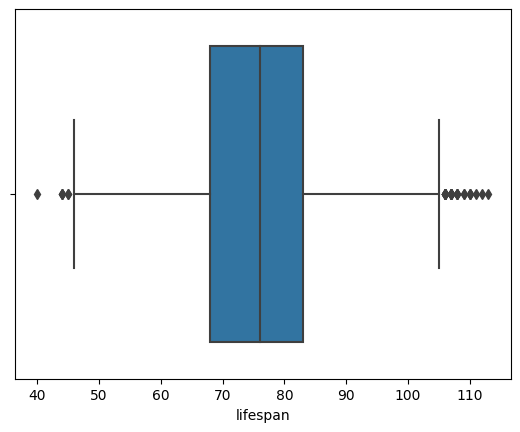

In [43]:
# checking outliers

sns.boxplot(x=df['lifespan'])

In [44]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print()
print(Q3)
print()
print(IQR)
df2 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

genetic      79.00
length      174.00
mass         70.00
exercise      1.00
smoking       3.00
alcohol       4.00
sugar         2.00
bmi          20.34
lifespan     68.00
Name: 0.25, dtype: float64

genetic      81.00
length      193.00
mass         88.00
exercise      2.00
smoking      16.00
alcohol       8.00
sugar         3.00
bmi          27.12
lifespan     83.00
Name: 0.75, dtype: float64

genetic      2.00
length      19.00
mass        18.00
exercise     1.00
smoking     13.00
alcohol      4.00
sugar        1.00
bmi          6.78
lifespan    15.00
dtype: float64


,genetic,length,mass,exercise,smoking,alcohol,sugar,bmi,lifespan
genetic,1.000000,-0.004323,-0.009685,0.003027,-0.010355,0.003962,-0.005416,-0.007306,0.154643
length,-0.004323,1.000000,0.058428,-0.009076,-0.006104,0.009601,-0.017141,-0.647232,0.168305
mass,-0.009685,0.058428,1.000000,0.007022,0.013320,-0.004056,0.003230,0.713329,-0.189491
exercise,0.003027,-0.009076,0.007022,1.000000,-0.007762,0.009659,0.003081,0.008353,0.665609
smoking,-0.010355,-0.006104,0.013320,-0.007762,1.000000,-0.003563,-0.005709,0.016643,-0.535057
alcohol,0.003962,0.009601,-0.004056,0.009659,-0.003563,1.000000,0.007550,-0.010460,-0.216630
sugar,-0.005416,-0.017141,0.003230,0.003081,-0.005709,0.007550,1.000000,0.014259,-0.247091
bmi,-0.007306,-0.647232,0.713329,0.008353,0.016643,-0.010460,0.014259,1.000000,-0.266184
lifespan,0.154643,0.168305,-0.189491,0.665609,-0.535057,-0.216630,-0.247091,-0.266184,1.000000


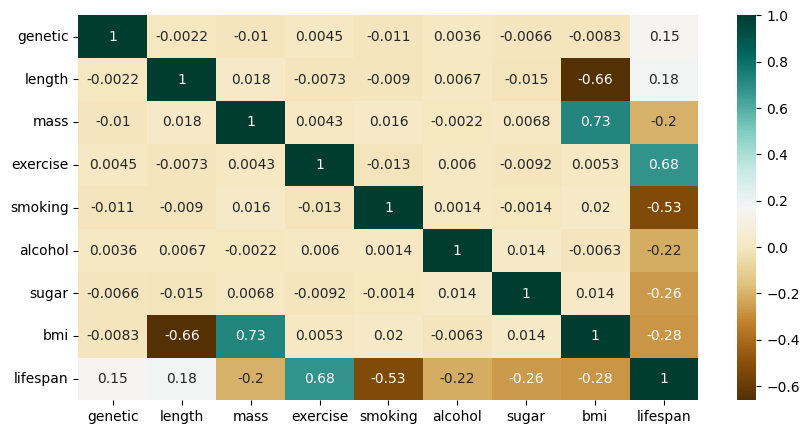

In [45]:
# checking the relevance without oultliers

plt.figure(figsize=(10,5))
c2= df2.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c2

,genetic,length,mass,exercise,smoking,alcohol,sugar,bmi,lifespan
genetic,1.000000,-0.002151,-0.010059,0.004464,-0.011032,0.003612,-0.006626,-0.008296,0.152144
length,-0.002151,1.000000,0.017750,-0.007252,-0.008966,0.006750,-0.015262,-0.661775,0.179911
mass,-0.010059,0.017750,1.000000,0.004304,0.016148,-0.002182,0.006780,0.726127,-0.201487
exercise,0.004464,-0.007252,0.004304,1.000000,-0.012758,0.005955,-0.009249,0.005272,0.677365
smoking,-0.011032,-0.008966,0.016148,-0.012758,1.000000,0.001413,-0.001368,0.019502,-0.525613
alcohol,0.003612,0.006750,-0.002182,0.005955,0.001413,1.000000,0.013864,-0.006258,-0.216818
sugar,-0.006626,-0.015262,0.006780,-0.009249,-0.001368,0.013864,1.000000,0.014235,-0.263895
bmi,-0.008296,-0.661775,0.726127,0.005272,0.019502,-0.006258,0.014235,1.000000,-0.276971
lifespan,0.152144,0.179911,-0.201487,0.677365,-0.525613,-0.216818,-0.263895,-0.276971,1.000000


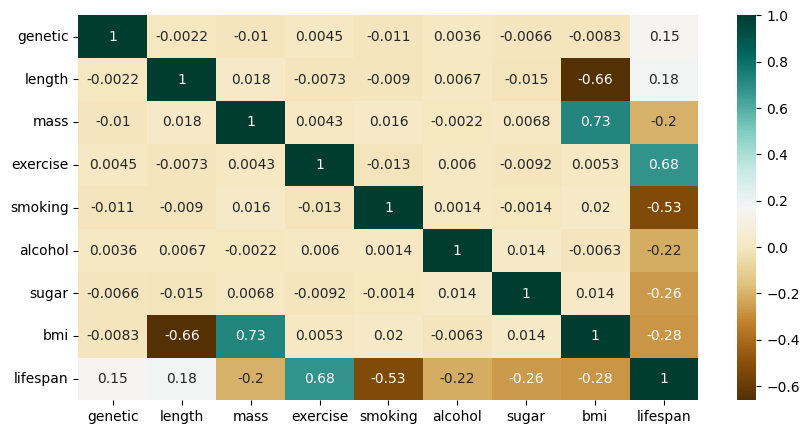

In [46]:
# checking the relevance with outliers

plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [47]:
# save the cleaned up data as csv for future use
# df.to_csv("C:/Users/nilsm/MakeAIWork/projects/project1/csv_files/data_clean.csv", index=False)

(<matplotlib.collections.PathCollection at 0x263e3003f40>,
 Text(0.5, 1.0, 'Go sports!'),
 Text(0, 0.5, 'lifespan'),
 Text(0.5, 0, 'exercise'))

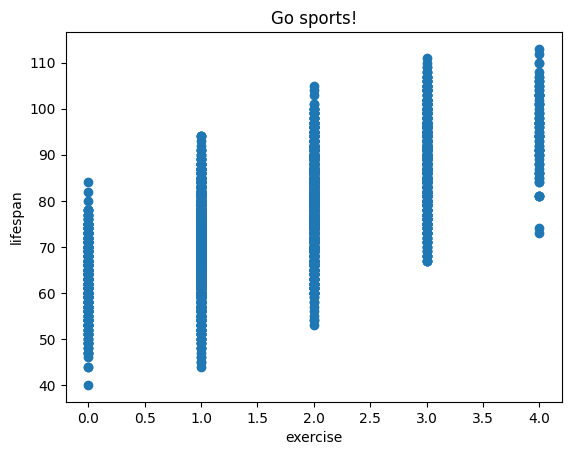

In [58]:
# plottig some columns with high correlation.
plt.scatter(df['exercise'], df['lifespan'])
plt.title("Go sports!")
plt.ylabel('lifespan')
plt.xlabel('exercise')

Text(0.5, 0, 'smoking')

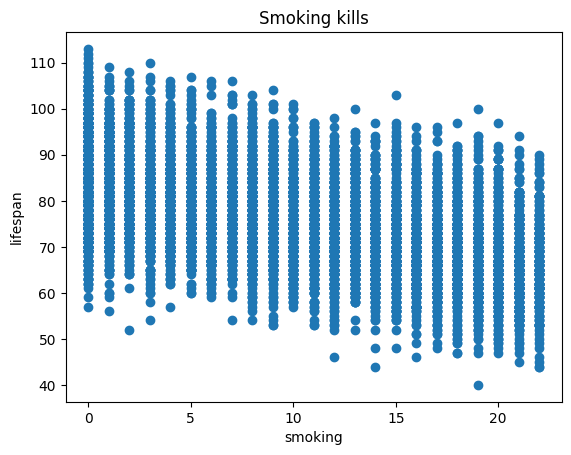

In [49]:
# plottig some columns with high correlation.
plt.scatter(df['smoking'], df['lifespan'])
plt.title("Smoking kills")
plt.ylabel('lifespan')
plt.xlabel('smoking')

Text(0.5, 0, 'bmi')

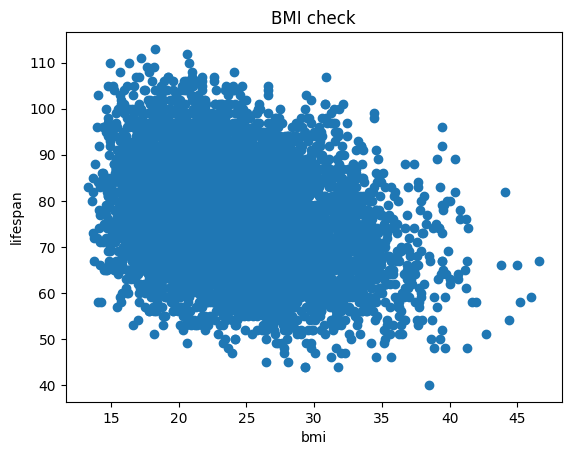

In [50]:
# plottig some columns with moderate to high correlation.
plt.scatter(df['bmi'], df['lifespan'])
plt.title("BMI check")
plt.ylabel('lifespan')
plt.xlabel('bmi')

Text(0.5, 0, 'sugar')

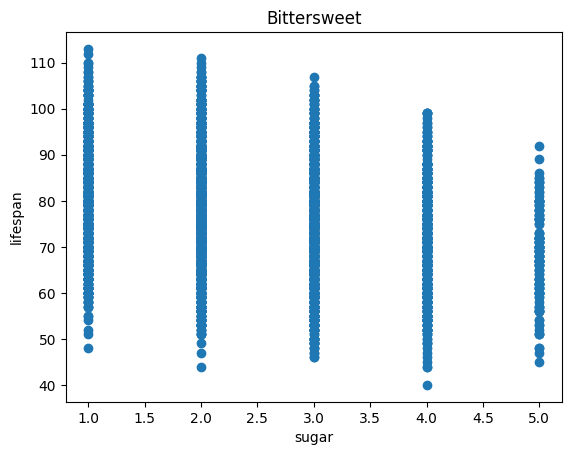

In [51]:
# plottig some columns with moderate to high correlation.
plt.scatter(df['sugar'], df['lifespan'])
plt.title("Bittersweet")
plt.ylabel('lifespan')
plt.xlabel('sugar')

Text(0.5, 0, 'alcohol')

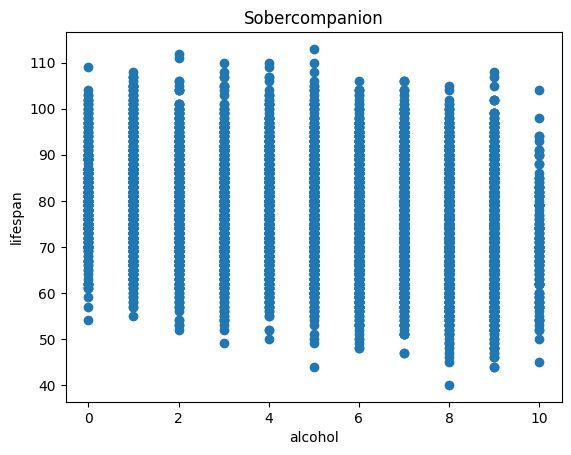

In [52]:
# plottig some columns with moderate to high correlation.
plt.scatter(df['alcohol'], df['lifespan'])
plt.title("Sobercompanion")
plt.ylabel('lifespan')
plt.xlabel('alcohol')

Text(0.5, 0, 'mass')

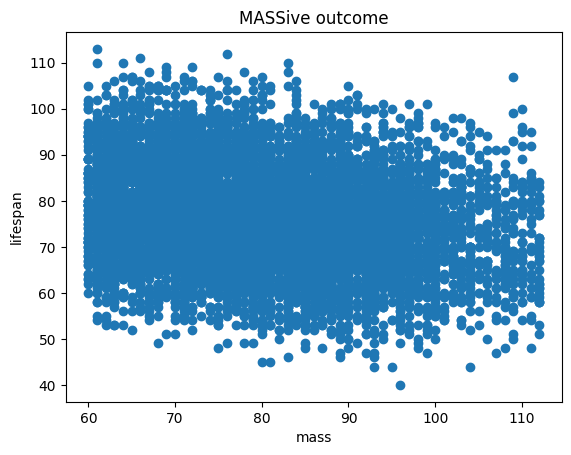

In [53]:
# plottig some columns with moderate to high correlation.
plt.scatter(df['mass'], df['lifespan'])
plt.title("MASSive outcome")
plt.ylabel('lifespan')
plt.xlabel('mass')

Text(0.5, 0, 'length')

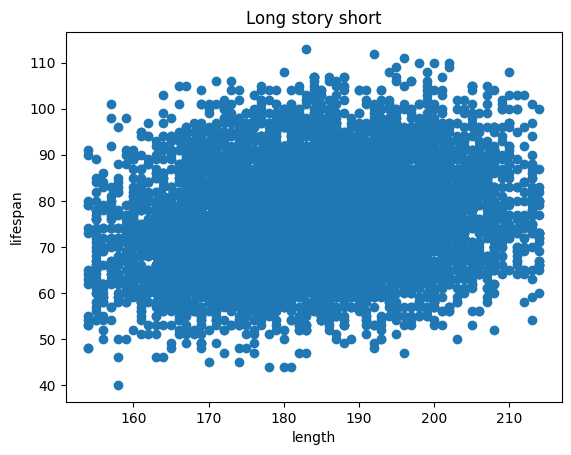

In [54]:
# plottig some columns with moderate correlation.
plt.scatter(df['length'], df['lifespan'])
plt.title("Long story short")
plt.ylabel('lifespan')
plt.xlabel('length')

Text(0.5, 0, 'genetic')

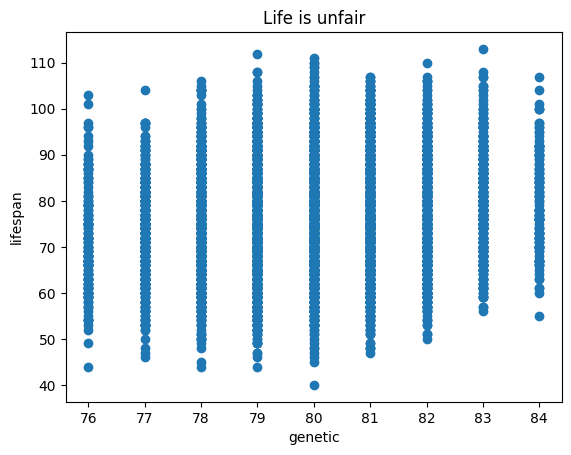

In [55]:
# plottig some columns with moderate correlation.
plt.scatter(df['genetic'], df['lifespan'])
plt.title("Life is unfair")
plt.ylabel('lifespan')
plt.xlabel('genetic')